# WGAN-GP训练
## 引入

In [1]:
%matplotlib inline
import os
import pickle
import matplotlib.pyplot as plt

from models import WGANGP
from utils import load_celeb

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [2]:
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.makedirs(RUN_FOLDER)
    os.makedirs(os.path.join(RUN_FOLDER, 'viz'))
    os.makedirs(os.path.join(RUN_FOLDER, 'images'))
    os.makedirs(os.path.join(RUN_FOLDER, 'weights'))

MODE = 'build' # 'load'

Found 202599 images belonging to 1 classes.


array([[[-0.08235294, -0.08235294, -0.08235294],
        [-0.08235294, -0.08235294, -0.08235294],
        [-0.08235294, -0.08235294, -0.08235294],
        ...,
        [ 0.16862746,  0.18431373,  0.16078432],
        [ 0.1764706 ,  0.19215687,  0.16862746],
        [ 0.18431373,  0.22352941,  0.19215687]],

       [[-0.08235294, -0.08235294, -0.08235294],
        [-0.08235294, -0.08235294, -0.08235294],
        [-0.08235294, -0.08235294, -0.08235294],
        ...,
        [ 0.16862746,  0.18431373,  0.16078432],
        [ 0.1764706 ,  0.19215687,  0.16862746],
        [ 0.18431373,  0.2       ,  0.1764706 ]],

       [[-0.09019608, -0.09019608, -0.09019608],
        [-0.08235294, -0.08235294, -0.08235294],
        [-0.07450981, -0.07450981, -0.07450981],
        ...,
        [ 0.16862746,  0.18431373,  0.16078432],
        [ 0.1764706 ,  0.19215687,  0.16862746],
        [ 0.19215687,  0.19215687,  0.1764706 ]],

       ...,

       [[-0.25490198, -0.52156866, -0.5137255 ],
        [-0

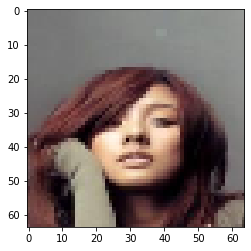

In [3]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)
x_train[0][0][0]
plt.imshow((x_train[0][0][0]+1)/2)

In [5]:
gan = WGANGP(
    input_dim=(IMAGE_SIZE, IMAGE_SIZE, 3),
    critic_conv_filters=[64, 128, 256, 512],
    critic_conv_kernel_size=[5, 5, 5, 5],
    critic_conv_strides=[2, 2, 2, 2],
    critic_batch_norm_momentum=None,
    critic_activation='leaky_relu',
    critic_dropout_rate=None,
    critic_learning_rate=0.0002,
    generator_initial_dense_layer_size=(4, 4, 512),
    generator_upsample=[1, 1, 1, 1],
    generator_conv_filters=[256, 128, 64, 3],
    generator_conv_kernel_size=[5, 5, 5, 5],
    generator_conv_strides=[2, 2, 2, 2],
    generator_batch_norm_momentum=0.9,
    generator_activation='leaky_relu',
    generator_dropout_rate=None,
    generator_learning_rate=0.0002,
    optimizer='adam',
    grad_weight = 10,
    z_dim=100,
    batch_size=BATCH_SIZE
)

if MODE == 'build':
    gan.save(RUN_FOLDER)
else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

In [6]:
gan.critic.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    [(None, 64, 64, 3)]       0         
_________________________________________________________________
critic_conv_0 (Conv2D)       multiple                  4864      
_________________________________________________________________
leaky_re_lu (LeakyReLU)      multiple                  0         
_________________________________________________________________
critic_conv_1 (Conv2D)       multiple                  204928    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    multiple                  0         
_________________________________________________________________
critic_conv_2 (Conv2D)       multiple                  819456    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    multiple                  0     

In [7]:
gan.generator.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) [(None, 100)]             0         
_________________________________________________________________
dense_1 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization (BatchNo (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_1 (Batch (None, 8, 8, 256)         1024

In [ ]:
EPOCHS = 6000
PRINT_EVERY_N_BATCHES = 5
N_CRITIC = 5
BATCH_SIZE = 64

gan.train(     
    x_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    run_folder=RUN_FOLDER,
    print_every_n_batches=PRINT_EVERY_N_BATCHES,
    n_critic=N_CRITIC,
    using_generator=True
)

In [ ]:
fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 2000)

plt.show()